
# Matplotlib — Guida pratica con esempi (Figure, Axes, Subplots, Mosaic, Line/Scatter/Bar/Hist, Salvataggio)
**Fonte:** slide "6-Matplotlib.pdf".  
**Obiettivo:** spiegare l'interfaccia OO (Figure/Axes), subplots classici e `subplot_mosaic`, tipologie di grafico comuni e salvataggio figure.


In [3]:

# Setup: import base
import numpy as np
import matplotlib.pyplot as plt

np.__version__


'2.3.1'


## 1) Interfacce Matplotlib: OO vs pyplot (stato)
Matplotlib offre due stili d'uso:
- **Stile pyplot (stateful)**: funzioni su `plt` che operano sulla **figura/assi correnti**.
- **Stile OO (object-oriented, consigliato)**: chiami i metodi sugli oggetti `Figure` e `Axes` che **crei e gestisci esplicitamente**.
In questo notebook usiamo principalmente l'interfaccia OO.



## 2) Figure e Axes: creazione e concetti base
Una **Figure** è il contenitore generale; al suo interno vivono uno o più **Axes** (il "sistema di assi" su cui disegni).


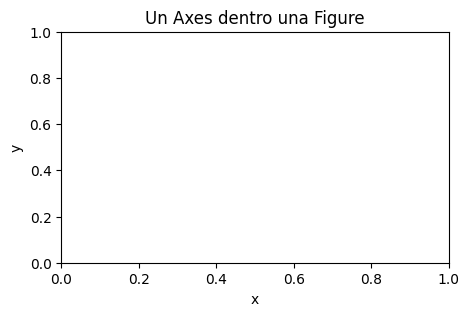

In [4]:

# Figura con un solo Axes
fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title("Un Axes dentro una Figure")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()



## 3) Line plot: una o più serie sullo stesso Axes
`Axes.plot(x, y)` disegna una linea che congiunge i punti (x, y). Chiamate successive aggiungono nuove linee allo **stesso** Axes.


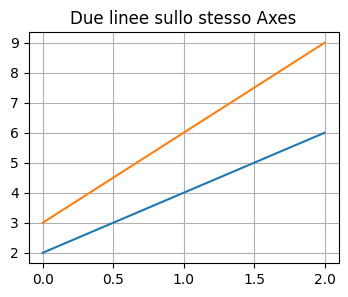

In [5]:

x = [0, 1, 2]
y1 = [2, 4, 6]
y2 = [3, 6, 9]

fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(x, y1)              # prima linea
ax.plot(x, y2)              # seconda linea (stesso Axes)
ax.set_title("Due linee sullo stesso Axes")
ax.grid(True)
plt.show()



## 4) Subplots: griglie regolari (n righe × m colonne)
`plt.subplots(nrows, ncols)` ritorna una `Figure` e un array NumPy di `Axes`.


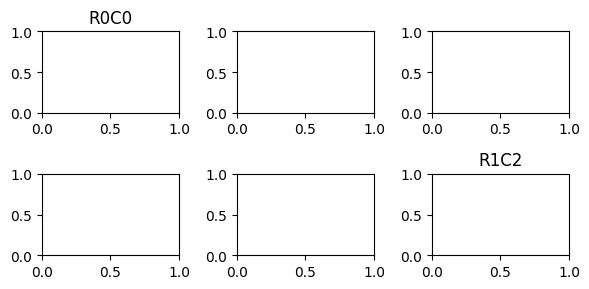

In [6]:

# 2 righe x 3 colonne => 6 Axes
fig, ax = plt.subplots(2, 3, figsize=(6, 3))
# Esempio: scrivo titoli diversi su alcuni pannelli
ax[0,0].set_title("R0C0")
ax[1,2].set_title("R1C2")
plt.tight_layout()  # elimina sovrapposizioni
plt.show()



### 4.1) Esempi di indexing dell'array di Axes
Con `1 × n` o `n × 1`, `ax` è 1D; con `m × n`, `ax` è 2D e si indicizza con `ax[i, j]`.


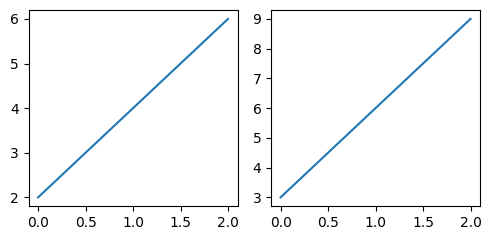

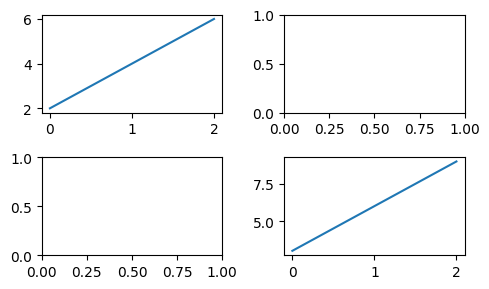

In [7]:

# 1 riga x 2 colonne (ax è 1D)
fig, ax = plt.subplots(1, 2, figsize=(5, 2.5))
ax[0].plot([0,1,2], [2,4,6])
ax[1].plot([0,1,2], [3,6,9])
plt.tight_layout()
plt.show()

# 2 x 2 (ax è 2D)
fig, ax = plt.subplots(2, 2, figsize=(5, 3))
ax[0,0].plot([0,1,2], [2,4,6])
ax[1,1].plot([0,1,2], [3,6,9])
plt.tight_layout()
plt.show()



## 5) Mosaic subplot: layout flessibile con ASCII
`plt.subplot_mosaic(layout_ascii)` permette layout a **tessere** specificando un "disegno" in ASCII.  
Restituisce un **dizionario** di `Axes` indicizzati dai caratteri usati.


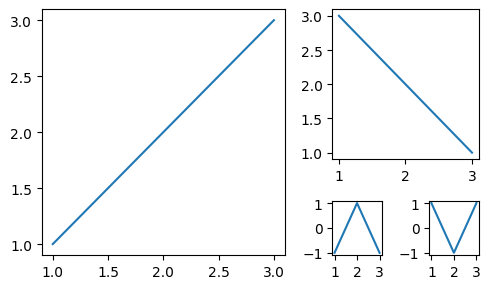

In [8]:

layout = """AAABB
AAABB
AAACD
"""

fig, ax = plt.subplot_mosaic(layout, figsize=(5, 3))
ax["A"].plot([1,2,3],[1,2,3])
ax["B"].plot([1,2,3],[3,2,1])
ax["C"].plot([1,2,3],[-1,1,-1])
ax["D"].plot([1,2,3],[1,-1,1])
plt.tight_layout()
plt.show()



## 6) Line plot: stile linea, marker, legenda
Opzioni comuni:
- `linestyle='-' | '--' | ':' | 'dashed' | 'dotted'`
- `marker='o' | '*' | '+' | '^' | ...`
- `label='nome curva'` per mostrare la legenda con `ax.legend(...)`.


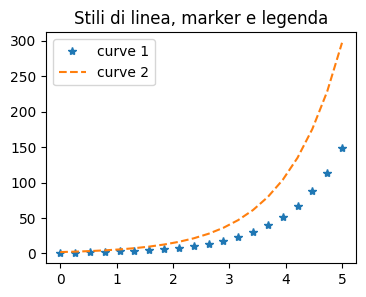

In [9]:

x = np.linspace(0, 5, 20)
y = np.exp(x)

fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(x, y, linestyle='', marker='*', label='curve 1')
ax.plot(x, 2*y, linestyle='--', label='curve 2')
ax.legend(loc='best')  # posizione automatica
ax.set_title("Stili di linea, marker e legenda")
plt.show()



## 7) Scatter plot: colore e colormap
`Axes.scatter(x, y, c=valori)` mappa `valori` su una colormap; con `s=` imposti l'**area** dei punti (in dpi^2).


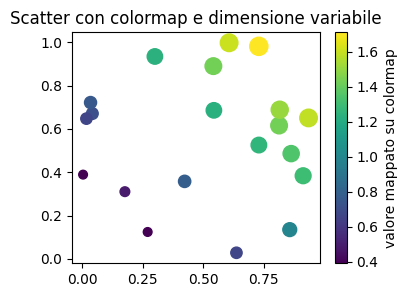

In [10]:

rng = np.random.default_rng(0)
x = rng.random(20)
y = rng.random(20)
cvals = x + y
sizes = 100 * (x + y)  # aree (dpi^2)

fig, ax = plt.subplots(figsize=(4, 3))
sc = ax.scatter(x, y, c=cvals, s=sizes, cmap='viridis')
cb = plt.colorbar(sc, ax=ax)
cb.set_label("valore mappato su colormap")
ax.set_title("Scatter con colormap e dimensione variabile")
plt.show()



## 8) Bar chart: base, etichette asse x, barre raggruppate


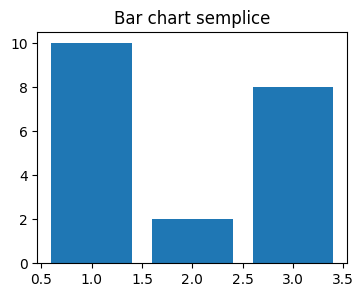

In [11]:

# Base
height = [10, 2, 8]
x = [1, 2, 3]
fig, ax = plt.subplots(figsize=(4, 3))
ax.bar(x, height)
ax.set_title("Bar chart semplice")
plt.show()


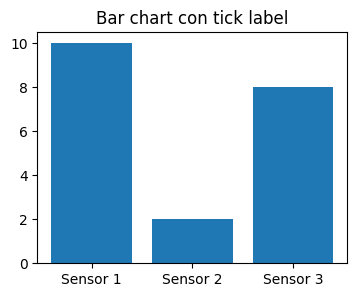

In [12]:

# Con etichette sui tick
height = [10, 2, 8]
x = [1, 2, 3]
labels = ['Sensor 1', 'Sensor 2', 'Sensor 3']
fig, ax = plt.subplots(figsize=(4, 3))
ax.bar(x, height, tick_label=labels)
ax.set_title("Bar chart con tick label")
plt.show()


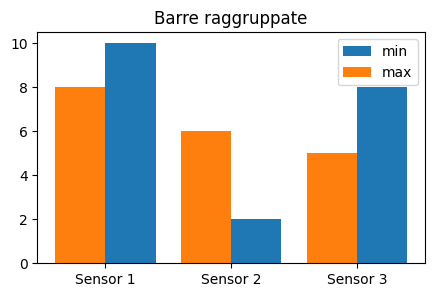

In [13]:

# Barre raggruppate
height_min = [10, 2, 8]
height_max = [8, 6, 5]
x = np.arange(3)
width = 0.4
labels = ['Sensor 1', 'Sensor 2', 'Sensor 3']

fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(x + width/2, height_min, width=width, label='min')
ax.bar(x - width/2, height_max, width=width, label='max')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')
ax.set_title("Barre raggruppate")
plt.show()



## 9) Istogrammi: distribuzioni e binning
`Axes.hist(values, bins=...)` visualizza il conteggio per intervalli (usa `np.histogram` sotto il cofano).


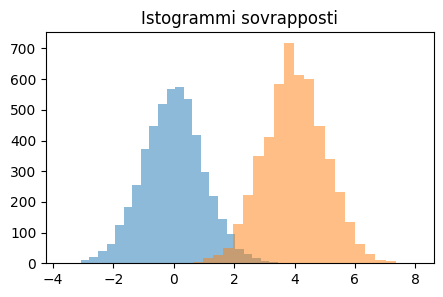

In [14]:

rng = np.random.default_rng(42)
values1 = rng.normal(0, 1, 5000)
values2 = rng.normal(4, 1, 5000)

fig, ax = plt.subplots(figsize=(5, 3))
ax.hist(values1, alpha=0.5, bins=25)
ax.hist(values2, alpha=0.5, bins=25)
ax.set_title("Istogrammi sovrapposti")
plt.show()



## 10) Salvataggio figure su file
Usa `Figure.savefig(path)` per salvare in formati diversi: `png`, `jpg`, `pdf`, `svg`, `eps`.


'D:\\Utente\\Desktop\\MAGISTRALE 2025\\Data science\\matplotlib_demo_export.png'

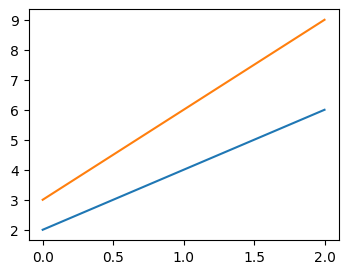

In [16]:

# Esempio di salvataggio
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot([0,1,2], [2,4,6])
ax.plot([0,1,2], [3,6,9])
out_path = "D:\\Utente\\Desktop\\MAGISTRALE 2025\\Data science\\matplotlib_demo_export.png"
fig.savefig(out_path, dpi=150)
out_path



## 11) Riferimenti utili
- Documentazione Matplotlib: https://matplotlib.org/
- Galleria esempi: https://matplotlib.org/stable/gallery/index.html



---
*Notebook creato automaticamente.*
